Focus on ED for now - simple stuff first!!
Arrival and departure curves from ED
	- Comapre UHS and PHT
	- Weekday vs. weekend

Arrivals/period - overtime

Summary stats of variation for:
Arrival - first clinitian
Triage - …
DTA - admission
 - how vary by time of day/year

Seasonality stats?


In [1]:
#import dep
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# local import
from hospital import *

In [2]:
hh = hosp('hh')

----------------------------------------
Created hosp class instance:  hh
----------------------------------------
--------------------
Patient fileload: 
--------------------
Found:  hhEDpat.pkl
Missing:  hhIPpat.pkl
--------------------
Daily fileload: 
--------------------
Missing:  hhEDday.pkl
Missing:  hhIPday.pkl


In [3]:
pat = hh.pat.get_ED()

In [4]:
pat.shape

(567635, 23)

In [5]:
pat.head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,waiting_time,breach_flag,arrive_hour,arrive_dayofweek,arrive_month,arrive_weekday_name,depart_hour,depart_dayofweek,depart_month,depart_weekday_name
0,489709,43,Female,BNHH,2012-08-01 00:04:00,2.0,2012-08-01 00:18:00,2012-08-01 02:24:00,NaN,NaN,...,220.0,0,0,2,8,Wednesday,3,2,8,Wednesday


In [6]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_weekday_name', 'depart_hour',
       'depart_dayofweek', 'depart_month', 'depart_weekday_name'],
      dtype='object')

# Cleaning

check for long wait times

In [81]:
pat[pat.waiting_time > 7*24*60].shape

(0, 24)

Also some patients that have negative wait times

In [84]:
pat[pat.waiting_time < 0].shape

(0, 24)

In [12]:
pat = pat[pat.waiting_time > 0]

In [13]:
pat.reset_index(drop=True,inplace=True)

### Hourly discharge curves - looks like i need pat level df for medians/IQR calcs + groupby is crazy quick!

input: weekday/weekend, range of dates, 

output: 

In [14]:
f = lambda x : x.date()

pat['arrive_date'] = pat['arrive_datetime'].apply(f)

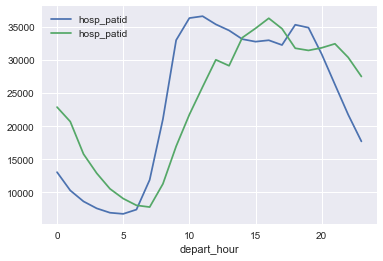

In [16]:
ax = plt.subplot()
arr = pat[['arrive_hour','hosp_patid']].groupby(['arrive_hour']).count()#.plot(ax=ax)
dep = pat[['depart_hour','hosp_patid']].groupby(['depart_hour']).count()#.plot(ax=ax)
arr.plot(ax=ax)
dep.plot(ax=ax)
ax.set_xticks(np.arange(0,25,2));

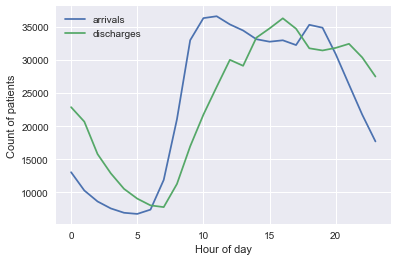

In [17]:
ax = plt.subplot();
arr = pat[['arrive_hour','hosp_patid']].groupby(['arrive_hour']).count()#.plot(ax=ax)
dep = pat[['depart_hour','hosp_patid']].groupby(['depart_hour']).count()#.plot(ax=ax)
arr.plot(ax=ax);
dep.plot(ax=ax);
ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Count of patients');
ax.set_xticks(np.arange(0,25,2));

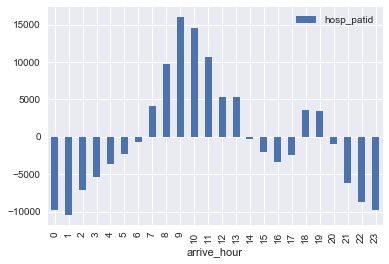

In [18]:
ax1 = plt.subplot();
(arr-dep).plot(kind='bar',ax=ax1);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy');

In [44]:
np.arange(0,25,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24])

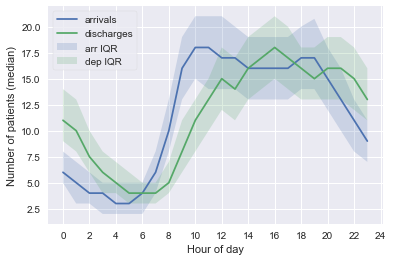

In [46]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_dep_m = daily_dep.groupby(['depart_hour']).median()#['hosp_patid'].plot()
daily_arr_m = daily_arr.groupby(['arrive_hour']).median()#['hosp_patid'].plot()

daily_arr_UQ = daily_arr.groupby(['arrive_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_arr_LQ = daily_arr.groupby(['arrive_hour']).quantile(0.25)#['hosp_patid'].plot() 


daily_dep_UQ = daily_dep.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
daily_dep_LQ = daily_dep.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 


ax = plt.subplot()

daily_arr_m.plot(ax=ax)


ax.fill_between(x = daily_arr_UQ.index,y1=daily_arr_UQ['hosp_patid'],y2=daily_arr_LQ['hosp_patid'],alpha=0.2)

daily_dep_m.plot(ax=ax)
ax.fill_between(x = daily_dep_UQ.index,y1=daily_dep_UQ['hosp_patid'],y2=daily_dep_LQ['hosp_patid'],alpha=0.2)


ax.legend(['arrivals','departures','arr IQR','dep IQR'],frameon=True,loc='upper left');
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (median)');
ax.set_xticks(np.arange(0,25,2));

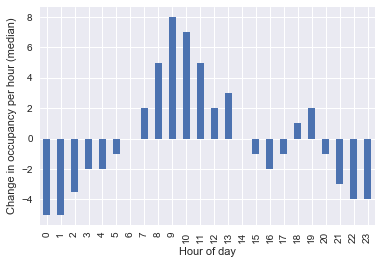

In [37]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour (median)');
ax.legend([])

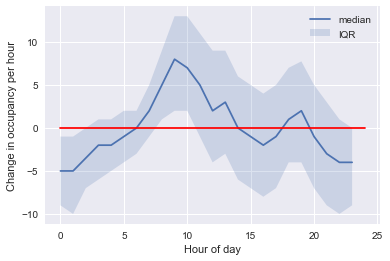

In [36]:
ax = plt.subplot();
(daily_arr_m-daily_dep_m).plot(ax=ax);


y1 = (daily_arr_UQ - daily_dep_LQ)['hosp_patid']
y2 = (daily_arr_LQ - daily_dep_UQ)['hosp_patid']

ax.fill_between(x = daily_dep_UQ.index,y1=y1,y2=y2,alpha=0.2)



ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy per hour');
ax.legend(['median','IQR'])
ax.plot([0,24],[0,0],'r')
ax.set_xticks(np.arange(0,25,2));

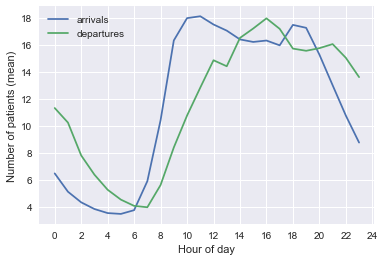

In [50]:
daily_dep = pat[['depart_hour','arrive_date','hosp_patid']].groupby(['depart_hour','arrive_date']).count()
daily_arr = pat[['arrive_hour','arrive_date','hosp_patid']].groupby(['arrive_hour','arrive_date']).count()

daily_arr = daily_arr.groupby(['arrive_hour']).mean()#['hosp_patid'].plot()
daily_dep = daily_dep.groupby(['depart_hour']).mean()#['hosp_patid'].plot()


#UQ = daily.groupby(['depart_hour']).quantile(0.75)#['hosp_patid'].plot()
#LQ = daily.groupby(['depart_hour']).quantile(0.25)#['hosp_patid'].plot() 

ax = plt.subplot()
daily_arr.plot(ax=ax)
daily_dep.plot(ax=ax)

ax.legend(['arrivals','departures']);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Number of patients (mean)');
ax.set_xticks(np.arange(0,25,2));

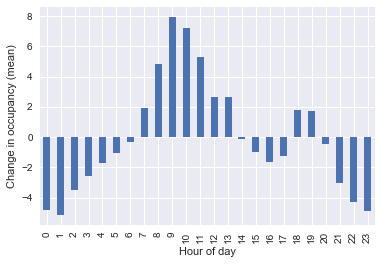

In [51]:
ax = plt.subplot();
(daily_arr-daily_dep).plot(kind='bar',ax=ax);
ax.set_xlabel('Hour of day');
ax.set_ylabel('Change in occupancy (mean)');
ax.legend([])

# Arrival trends over time

In [ ]:
pat[0:1].arrive_datetime[0].week

In [52]:
f = lambda x : x.week()

test = pat.copy()
#pat['arrive_date'] = pat['arrive_datetime'].apply(f)

In [53]:
test.head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,breach_flag,arrive_hour,arrive_dayofweek,arrive_month,arrive_weekday_name,depart_hour,depart_dayofweek,depart_month,depart_weekday_name,arrive_date
0,489709,43,Female,BNHH,2012-08-01 00:04:00,2.0,2012-08-01 00:18:00,2012-08-01 02:24:00,NaN,NaN,...,0,0,2,8,Wednesday,3,2,8,Wednesday,2012-08-01


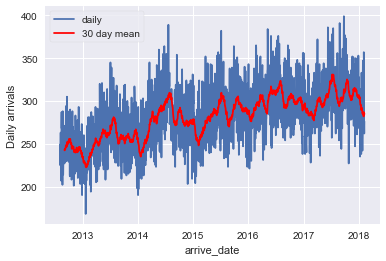

In [80]:
ax = plt.subplot()
pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].plot(ax=ax)
pat[['arrive_date','hosp_patid']].groupby('arrive_date').count()[:-1].rolling(30).mean().plot(ax=ax,color='r')
ax.set_ylabel('Daily arrivals')
ax.legend(['daily','30 day mean'],frameon=True)

### Summary stats of variation for: Arrival - first clinitian Triage - … DTA - admission

In [95]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_weekday_name', 'depart_hour',
       'depart_dayofweek', 'depart_month', 'depart_weekday_name',
       'arrive_date'],
      dtype='object')

In [ ]:
def convert_adm_request_datetime(df):
    """
    creates a new column which has datetime of bed request (from time)
    """
    

In [149]:
def f(x):
    y = str(x.arrive_date) + ' ' + x.first_adm_request_time
    return y

In [154]:
mask = ~pat.first_adm_request_time.isnull()

In [155]:
pat['first_adm_request_datetime'] = pat[mask].apply(f,axis=1) # add date and time together

In [158]:
pat['first_adm_request_datetime'] = pat[mask]['first_adm_request_datetime'].apply(lambda x: pd.to_datetime(x)) # convert str to datetime

add + 1D to all values where patient has overlapped midnight

In [186]:
mask = (pat['first_adm_request_datetime'] - pat['arrive_datetime']) < pd.Timedelta(0, unit='D')

In [193]:
pat['first_adm_request_datetime'] = pat[mask]['first_adm_request_datetime'] + pd.Timedelta(1, unit='D')

create minutes waited at each stage for each patient

In [196]:
pat.columns

Index(['hosp_patid', 'age', 'gender', 'site', 'arrive_datetime', 'arrive_mode',
       'first_triage_datetime', 'first_dr_datetime', 'first_adm_request_time',
       'adm_referral_loc', 'adm_flag', 'depart_datetime', 'stream',
       'waiting_time', 'breach_flag', 'arrive_hour', 'arrive_dayofweek',
       'arrive_month', 'arrive_weekday_name', 'depart_hour',
       'depart_dayofweek', 'depart_month', 'depart_weekday_name',
       'arrive_date', 'first_adm_request_datetime'],
      dtype='object')

In [201]:
pat['first_triage_wait'] = (pat.first_triage_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [202]:
pat['first_dr_wait'] = (pat.first_dr_datetime - pat.arrive_datetime) / pd.Timedelta('1 minute')

In [267]:
pat['first_adm_req_wait'] = (pat.depart_datetime - pat.first_adm_request_datetime) / pd.Timedelta('1 minute')

In [268]:
wait_cols = ['first_triage_wait','first_dr_wait','first_adm_req_wait','waiting_time']
dt_cols = ['arrive_datetime','first_triage_datetime','first_dr_datetime','first_adm_request_datetime','depart_datetime']

In [269]:
pat[pat.first_triage_wait == -11520][wait_cols + dt_cols]

,first_triage_wait,first_dr_wait,first_adm_req_wait,waiting_time,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime
312029,-11520.0,46.0,NaN,75.0,2018-01-24 16:27:00,2018-01-16 16:27:00,2018-01-24 17:13:00,NaT,2018-01-24 17:42:00


In [270]:
pat[pat.first_triage_wait == 383767.000000][wait_cols + dt_cols]

,first_triage_wait,first_dr_wait,first_adm_req_wait,waiting_time,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime
6138,383767.0,383906.0,NaN,179.0,2012-09-17 06:01:00,2013-06-10 18:08:00,2013-06-10 20:27:00,NaT,2012-09-17 09:00:00


In [271]:
pat[pat.first_dr_wait == -10009.000000][wait_cols + dt_cols]

,first_triage_wait,first_dr_wait,first_adm_req_wait,waiting_time,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime
561171,43.0,-10009.0,NaN,63.0,2017-12-26 12:34:00,2017-12-26 13:17:00,2017-12-19 13:45:00,NaT,2017-12-26 13:37:00


### waiting time plots

In [272]:
pat[wait_cols].describe()

,first_triage_wait,first_dr_wait,first_adm_req_wait,waiting_time
count,563201.000000,567093.000000,13025.000000,567157.000000
mean,12.049663,76.159755,86.777925,165.726293
std,512.257834,521.742708,286.538725,123.759873
min,-11520.000000,-10009.000000,-1405.700000,1.000000
25%,2.000000,26.000000,24.883333,84.000000
50%,7.000000,59.000000,65.666667,155.000000
75%,15.000000,110.000000,135.466667,223.000000
max,383767.000000,383906.000000,2393.833333,8942.000000


Some of these massive wait times are due to errors in dates etc. Lets see how many have crazy wait times... 

In [258]:
pat_list = []

In [259]:
cutoff_wait = 24*60

In [265]:
pat[pat.first_triage_wait > cutoff_wait][dt_cols]

,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime
6138,2012-09-17 06:01:00,2013-06-10 18:08:00,2013-06-10 20:27:00,NaT,2012-09-17 09:00:00
74167,2014-01-29 04:18:00,2014-01-30 07:37:00,2014-01-29 05:17:00,NaT,2014-01-29 08:17:00
349109,2013-05-25 23:38:00,2013-05-26 23:50:00,2013-05-26 01:26:00,NaT,2013-05-26 01:32:00
363781,2013-09-30 21:40:00,2013-10-01 21:55:00,2013-09-30 22:01:00,NaT,2013-10-01 01:30:00
365425,2013-10-14 23:25:00,2013-10-15 23:56:00,2013-10-15 00:14:00,NaT,2013-10-15 03:19:00
365708,2013-10-17 23:34:00,2013-10-18 23:35:00,2013-10-18 00:55:00,NaT,2013-10-18 03:12:00
367104,2013-10-29 23:39:00,2013-10-30 23:45:00,2013-10-30 00:31:00,2013-10-30 00:29:14,2013-10-30 01:00:00
516809,2017-01-29 15:14:00,2017-01-30 15:43:00,2017-01-30 18:20:00,NaT,2017-01-30 19:15:00
557241,2017-11-27 18:12:00,2017-11-28 19:44:00,2017-11-27 21:00:00,NaT,2017-11-27 22:31:00
559583,2017-12-14 20:11:00,2017-12-15 20:35:00,2017-12-14 20:27:00,NaT,2017-12-14 20:49:00


In [278]:
pat[pat.first_triage_wait < 0][dt_cols]

,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime
11665,2012-10-30 17:45:00,2012-10-30 17:35:00,2012-10-30 18:05:00,NaT,2012-10-30 20:57:00
12563,2012-11-07 08:50:00,2012-11-07 08:40:00,2012-11-07 09:54:00,NaT,2012-11-07 12:49:00
12655,2012-11-07 22:39:00,2012-11-07 21:55:00,2012-11-08 00:30:00,2012-11-08 02:08:38,2012-11-08 02:15:00
13346,2012-11-13 10:55:00,2012-11-13 10:50:00,2012-11-13 12:40:00,NaT,2012-11-13 14:44:00
13381,2012-11-13 14:34:00,2012-11-13 14:30:00,2012-11-13 15:00:00,NaT,2012-11-13 18:00:00
14252,2012-11-20 04:05:00,2012-11-20 04:00:00,2012-11-20 05:41:00,NaT,2012-11-20 07:52:00
14311,2012-11-20 15:52:00,2012-11-20 15:30:00,2012-11-20 16:44:00,NaT,2012-11-20 22:27:00
14359,2012-11-20 21:47:00,2012-11-20 21:45:00,2012-11-21 01:28:00,NaT,2012-11-21 02:30:00
14626,2012-11-23 03:30:00,2012-11-23 03:25:00,2012-11-23 03:32:00,NaT,2012-11-23 09:30:00
14695,2012-11-23 17:35:00,2012-11-23 17:15:00,2012-11-23 18:54:00,NaT,2012-11-23 20:29:00


In [261]:
pat[pat.first_dr_wait > cutoff_wait][dt_cols]

,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime
2679,2012-08-21 23:10:00,2012-08-21 23:11:00,2012-08-22 23:30:00,NaT,2012-08-22 01:09:00
6138,2012-09-17 06:01:00,2013-06-10 18:08:00,2013-06-10 20:27:00,NaT,2012-09-17 09:00:00
26436,2013-02-28 21:06:00,2013-02-28 21:18:00,2013-03-01 22:10:00,NaT,2013-02-28 22:10:00
27107,2013-03-05 21:35:00,2013-03-05 21:43:00,2013-03-06 21:50:00,NaT,2013-03-05 21:50:00
27967,2013-03-11 23:03:00,2013-03-11 23:15:00,2013-03-12 23:30:00,NaT,2013-03-12 01:06:00
28493,2013-03-16 06:45:00,2013-03-16 06:45:00,2013-03-17 08:25:00,NaT,2013-03-16 06:46:00
28858,2013-03-18 22:26:00,2013-03-18 22:37:00,2013-03-19 22:37:00,2013-03-19 01:38:45,2013-03-19 01:54:00
146849,2015-05-06 14:25:00,NaT,2015-05-15 08:11:00,NaT,2015-05-06 19:18:00
147440,2015-05-10 12:11:00,2015-05-10 12:11:00,2015-05-11 13:50:00,NaT,2015-05-10 13:50:00
150663,2015-05-30 11:32:00,2015-05-30 11:40:00,2015-05-31 11:44:00,NaT,2015-05-30 11:44:00


In [262]:
pat[pat.first_adm_req_wait > cutoff_wait][dt_cols]

,arrive_datetime,first_triage_datetime,first_dr_datetime,first_adm_request_datetime,depart_datetime


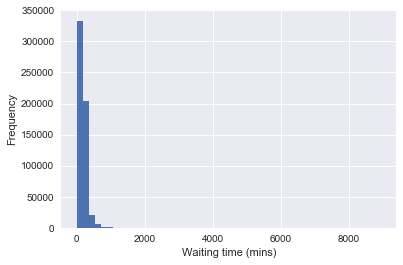

In [27]:
ax = plt.subplot();
pat.waiting_time.hist(bins=50,ax=ax);
ax.set_xlabel('Waiting time (mins)');
ax.set_ylabel('Frequency');

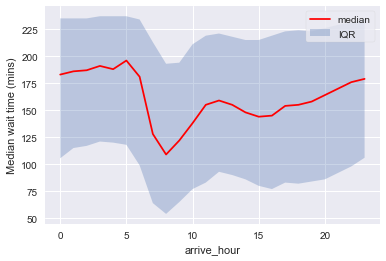

In [34]:
ax = plt.subplot();

UQR = pat[['waiting_time','arrive_hour']].groupby(['arrive_hour']).quantile(0.75)
LQR = pat[['waiting_time','arrive_hour']].groupby(['arrive_hour']).quantile(0.25)

ax.fill_between(x = UQR.index,y1=UQR['waiting_time'],y2=LQR['waiting_time'],alpha=0.3)
pat[['waiting_time','arrive_hour']].groupby(['arrive_hour']).median().plot(ax=ax,color='r')
ax.set_ylabel('Median wait time (mins)');
ax.legend(['median','IQR'],frameon=True)

In [215]:
24*60

1440

create mask for hist - some very long wait times squew plots massively

In [220]:
mask = pat.waiting_time < 1000

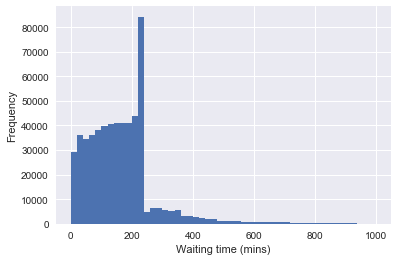

In [221]:
ax = plt.subplot();
pat[mask].waiting_time.hist(bins=50,ax=ax);
ax.set_xlabel('Waiting time (mins)');
ax.set_ylabel('Frequency');

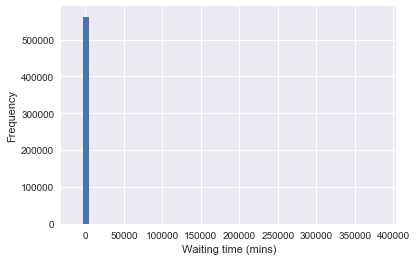

In [222]:
ax = plt.subplot();
pat[mask].first_triage_wait.hist(bins=50,ax=ax);
ax.set_xlabel('Waiting time (mins)');
ax.set_ylabel('Frequency');

In [205]:
pat.waiting_time.max()

8942.0

### admissions breakdown by time waiting for per speciality

In [206]:
8942/60

149.03333333333333

#### function to select dates - return df

In [86]:
start_date = pd.datetime(2012,12,31)
end_date =  pd.datetime(2018,12,31)

mask = (pat['arrive_datetime'] > start_date) & (pat['arrive_datetime'] <= end_date)

In [87]:
pat[mask].groupby(['arrive_date']).count().head(1)

,hosp_patid,age,gender,site,arrive_datetime,arrive_mode,first_triage_datetime,first_dr_datetime,first_adm_request_time,adm_referral_loc,...,waiting_time,breach_flag,arrive_hour,arrive_dayofweek,arrive_month,arrive_weekday_name,depart_hour,depart_dayofweek,depart_month,depart_weekday_name
arrive_date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,223,223,223,223,223,221,221,223,66,65,...,223,223,223,223,223,223,223,223,223,223


# functions to call plotting

In [88]:
def plot(df,include_dow=None,include_dates=None, include_months= None, include_years=None):
    if include_dates != None:
        # call date selection function, retunr df2
    
    if include_dow != None:
        # call day selection function, return df2
        
    #etc 
        
    # do plotting on df2 - groupbys
    # save plots out (how choose filenames)

IndentationError: expected an indented block (<ipython-input-88-ddef4a270f57>, line 5)

# dev

In [ ]:
break

In [483]:
path = './../../3_Data/HH_ED_Flow_Study.csv'

In [516]:
df = pd.read_csv(path,
        low_memory=False)

In [486]:
dt_cols = []
for i in df.columns:
    if 'DTTM' in i:
        dt_cols.append(i)

In [490]:
df[dt_cols]

,ARRIVAL_DTTM,INITIAL_ASSESSMENT_DTTM,SEEN_FOR_TREATMENT_DTTM,ATTENDANCE_CONCLUSION_DTTM
0,01/08/2012 00:04,01/08/2012 00:18,01/08/2012 02:24,01/08/2012 03:44
1,01/08/2012 00:37,01/08/2012 00:53,01/08/2012 02:43,01/08/2012 04:08
2,01/08/2012 00:55,01/08/2012 01:00,01/08/2012 01:24,01/08/2012 02:54
3,01/08/2012 00:58,01/08/2012 01:01,01/08/2012 02:04,01/08/2012 03:22
4,01/08/2012 01:40,01/08/2012 01:55,01/08/2012 02:27,01/08/2012 03:53
5,01/08/2012 02:25,01/08/2012 02:39,01/08/2012 03:38,01/08/2012 05:15
6,01/08/2012 02:47,01/08/2012 02:59,01/08/2012 05:32,01/08/2012 06:03
7,01/08/2012 03:53,01/08/2012 04:02,01/08/2012 04:23,01/08/2012 05:30
8,01/08/2012 04:00,01/08/2012 04:00,01/08/2012 04:31,01/08/2012 06:09
9,01/08/2012 04:30,01/08/2012 04:40,01/08/2012 05:32,01/08/2012 08:09


In [533]:
df.INITIAL_ASSESSMENT_DTTM[0][0:16]

'01/08/2012 00:18'

In [548]:
df[df.INITIAL_ASSESSMENT_DTTM == '1899-12-30 00:00:00.000000'].INITIAL_ASSESSMENT_DTTM

Series([], Name: INITIAL_ASSESSMENT_DTTM, dtype: object)

In [547]:
df.loc[df.INITIAL_ASSESSMENT_DTTM == '1899-12-30 00:00:00.000000', 'INITIAL_ASSESSMENT_DTTM'] = np.nan

In [541]:
'1899-12-30 00:00:00.000000'[0:16]

'1899-12-30 00:00'

In [496]:
df['ARRIVAL_DTTM'].dtype

dtype('O')

In [497]:
def convert_cols_datetime(x,col_names = None):
    """ convert either all columns with datetime in name to type datetime, or if col_names given only convert slected cols.
    input
    x: df,
    col_names: list of str, optional containing names of columns to convert
    return: new type converted df
    """
    print(40*'-')
    print('Converting cols to datetime...(may take some time depedning on size of df)...')
    print(20*'-')
    if col_names == None:
        for i in x.columns:
            if ('datetime' in i) & (x[i].dtype != np.dtype('datetime64[ns]')):
                #### selected cols have datetime in name and are not of type datetime64
                print(i)
                x[i] = pd.to_datetime(x[i])
    else:
        for i in col_names:
            print(i)
            x[i] = pd.to_datetime(x[i])
    print(20*'-')
    print('Conversion complete.')
    print(20*'-')

    return(x)

In [517]:
x = df[['ARRIVAL_DTTM','ATTENDANCE_CONCLUSION_DTTM']][-2000:]

In [518]:
x.tail()

,ARRIVAL_DTTM,ATTENDANCE_CONCLUSION_DTTM
567630,08/02/2018 22:24,09/02/2018 02:15
567631,08/02/2018 22:45,09/02/2018 02:10
567632,08/02/2018 23:16,09/02/2018 03:05
567633,08/02/2018 23:26,09/02/2018 04:22
567634,08/02/2018 23:32,09/02/2018 01:08


In [506]:
df2 = convert_cols_datetime(x,col_names = ['ARRIVAL_DTTM'])

----------------------------------------
Converting cols to datetime...(may take some time depedning on size of df)...
--------------------
ARRIVAL_DTTM
--------------------
Conversion complete.
--------------------


C:\Anaconda3\envs\hospital-flow\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [508]:
df2.tail()

,ARRIVAL_DTTM,ATTENDANCE_CONCLUSION_DTTM
567630,2018-08-02 22:24:00,09/02/2018 02:15
567631,2018-08-02 22:45:00,09/02/2018 02:10
567632,2018-08-02 23:16:00,09/02/2018 03:05
567633,2018-08-02 23:26:00,09/02/2018 04:22
567634,2018-08-02 23:32:00,09/02/2018 01:08


08/02/2018 22:24

In [524]:
raise Exception('Problem!')

Exception: Problem!

In [519]:
i = 'ARRIVAL_DTTM'

In [522]:
y = pd.to_datetime(x[i],format="%d/%m/%Y %H:%M")

In [523]:
y

565635   2018-01-26 00:25:00
565636   2018-01-26 01:05:00
565637   2018-01-26 03:14:00
565638   2018-01-26 03:34:00
565639   2018-01-26 03:55:00
565640   2018-01-26 04:04:00
565641   2018-01-26 04:46:00
565642   2018-01-26 05:21:00
565643   2018-01-26 06:26:00
565644   2018-01-26 07:17:00
565645   2018-01-26 07:43:00
565646   2018-01-26 07:45:00
565647   2018-01-26 08:41:00
565648   2018-01-26 08:44:00
565649   2018-01-26 09:17:00
565650   2018-01-26 09:24:00
565651   2018-01-26 09:29:00
565652   2018-01-26 09:36:00
565653   2018-01-26 09:43:00
565654   2018-01-26 09:55:00
565655   2018-01-26 09:56:00
565656   2018-01-26 09:57:00
565657   2018-01-26 10:01:00
565658   2018-01-26 10:08:00
565659   2018-01-26 10:17:00
565660   2018-01-26 10:21:00
565661   2018-01-26 10:42:00
565662   2018-01-26 10:50:00
565663   2018-01-26 11:03:00
565664   2018-01-26 11:04:00
                 ...        
567605   2018-02-08 19:20:00
567606   2018-02-08 19:28:00
567607   2018-02-08 19:35:00
567608   2018-

In [525]:
x

,ARRIVAL_DTTM,ATTENDANCE_CONCLUSION_DTTM
565635,26/01/2018 00:25,26/01/2018 01:40
565636,26/01/2018 01:05,26/01/2018 02:33
565637,26/01/2018 03:14,26/01/2018 06:42
565638,26/01/2018 03:34,26/01/2018 06:19
565639,26/01/2018 03:55,26/01/2018 06:06
565640,26/01/2018 04:04,26/01/2018 04:39
565641,26/01/2018 04:46,26/01/2018 05:54
565642,26/01/2018 05:21,26/01/2018 09:19
565643,26/01/2018 06:26,26/01/2018 07:47
565644,26/01/2018 07:17,26/01/2018 09:40


In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_date',
'ARRIVAL_DTTM':'arrival_time',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_time',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_time',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_time',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)



hh.ioED.checks()


In [ ]:
hh.ioED.get_EDraw()

In [ ]:
test.head()

In [ ]:
test.minutes_today.sum()

In [ ]:
test.columns


In [ ]:
pd.to_datetime(test.leaving_time)

In [ ]:
df

In [ ]:
df.head(1)

In [ ]:
df.index

In [ ]:
df['year'] = df.apply(lambda x: x.name.year ,axis=1)
df['year'] = df.apply(lambda x: x.name.year ,axis=1)
df['year'] = df.apply(lambda x: x.name.year ,axis=1)

df['date'] = df.index

In [ ]:
df.date.values

In [ ]:
df.date.values[0] #.astype(datetime)

In [ ]:
pd.to_datetime(df.date.values).weekday_name

# prefix to all cols test

In [ ]:
def prefix_cols(x,prefix):
    """ adds string prefix to all col names"""
    for i in df.columns:
        x.rename(columns={i:prefix + i},inplace=True)

In [ ]:
prefix_cols(df,'ED_')

In [ ]:
df

In [ ]:
df

In [ ]:
pd.to_datetime(df.index)

# Dev

In [ ]:
break

In [ ]:
#import dep
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# local import
from hospital import *

In [ ]:
hh = hosp('hh')

In [ ]:
hh_cols = {
'PSEUDONYMISED_PATIENT_ID':'dept_patid',
'PSEUDONYMISED_PATIENT_ID':'hosp_patid',
'AGE_AT_ARRIVAL':'age',
'GENDER_NATIONAL_DESCRIPTION':'gender',
'SITE':'site',
'ARRIVAL_DTTM':'arrival_datetime',
'ARRIVAL_MODE_NATIONAL_CODE':'arrival_mode',
'INITIAL_ASSESSMENT_DTTM':'first_triage_datetime',
'SEEN_FOR_TREATMENT_DTTM':'first_dr_datetime',
'SPECIALTY_REQUEST_TIME':'first_adm_request_time',
'SPECIALTY_REFERRED_TO_CODE':'adm_referral_loc',
'ADMISSION_FLAG':'departure_method',
'ATTENDANCE_CONCLUSION_DTTM':'leaving_datetime',
'STREAM_LOCAL_CODE':'stream'
}

### import data
hh.ioED.load_hosp_csv('./../../3_Data/HH_ED_Flow_Study.csv',hh_cols)

In [ ]:
hh.ioED.checks()

In [ ]:
df = hh.ioED.get_EDraw()
df = df[0:100]
hh.ioED.replace_EDraw(df)


In [ ]:
hh.ioED.convert_cols_datetime()

In [ ]:
hh.ioED.checks()

In [ ]:
hh.ioED.create_auto_columns()

In [ ]:
hh.ioED.checks()

In [ ]:
hh.ioED.get_EDraw().columns

In [ ]:
hh.ioED.

In [ ]:
df.shape

In [ ]:
df.arrival_datetime.dtype

In [ ]:
pd.to_datetime(df.arrival_datetime).dtype

In [ ]:
if ('datetime' in 'test_col_datetime') & (1 == 2):
    print('True')

In [ ]:
if not np.float in [np.int,np.float]:
    print('True')

In [ ]:
np.float in np.float

In [ ]:
hh = pd.read_csv('./../../3_data/HH_ED_Flow_Study.csv',usecols=hh_cols)

In [ ]:
hh

In [ ]:
hh.head(1)

In [ ]:
hh.columns

In [ ]:
for x in hh.columns:
    print(x)

In [ ]:
hh.head(1)